In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
original_data = pd.read_csv('Sleep_Efficiency.csv')
data = original_data.copy()

In [4]:
data.head()

,ID,Age,Gender,Bedtime,Wakeup time,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Smoking status,Exercise frequency
0,1,65,Female,2021-03-06 01:00:00,2021-03-06 07:00:00,6.0,0.88,18,70,12,0.0,0.0,0.0,Yes,3.0
1,2,69,Male,2021-12-05 02:00:00,2021-12-05 09:00:00,7.0,0.66,19,28,53,3.0,0.0,3.0,Yes,3.0
2,3,40,Female,2021-05-25 21:30:00,2021-05-25 05:30:00,8.0,0.89,20,70,10,1.0,0.0,0.0,No,3.0
3,4,40,Female,2021-11-03 02:30:00,2021-11-03 08:30:00,6.0,0.51,23,25,52,3.0,50.0,5.0,Yes,1.0
4,5,57,Male,2021-03-13 01:00:00,2021-03-13 09:00:00,8.0,0.76,27,55,18,3.0,0.0,3.0,No,3.0


In [5]:
data.drop(['ID'], axis= 1, inplace= True)


In [6]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     452 non-null    int64  
 1   Gender                  452 non-null    object 
 2   Bedtime                 452 non-null    object 
 3   Wakeup time             452 non-null    object 
 4   Sleep duration          452 non-null    float64
 5   Sleep efficiency        452 non-null    float64
 6   REM sleep percentage    452 non-null    int64  
 7   Deep sleep percentage   452 non-null    int64  
 8   Light sleep percentage  452 non-null    int64  
 9   Awakenings              432 non-null    float64
 10  Caffeine consumption    427 non-null    float64
 11  Alcohol consumption     438 non-null    float64
 12  Smoking status          452 non-null    object 
 13  Exercise frequency      446 non-null    float64
dtypes: float64(6), int64(4), object(4)
memory 

In [7]:
data.describe()

,Age,Sleep duration,Sleep efficiency,REM sleep percentage,Deep sleep percentage,Light sleep percentage,Awakenings,Caffeine consumption,Alcohol consumption,Exercise frequency
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,432.000000,427.000000,438.000000,446.000000
mean,40.285398,7.465708,0.788916,22.615044,52.823009,24.561947,1.641204,23.653396,1.173516,1.791480
std,13.172250,0.866625,0.135237,3.525963,15.654235,15.313665,1.356762,30.202785,1.621377,1.428134
min,9.000000,5.000000,0.500000,15.000000,18.000000,7.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,7.000000,0.697500,20.000000,48.250000,15.000000,1.000000,0.000000,0.000000,0.000000
50%,40.000000,7.500000,0.820000,22.000000,58.000000,18.000000,1.000000,25.000000,0.000000,2.000000
75%,52.000000,8.000000,0.900000,25.000000,63.000000,32.500000,3.000000,50.000000,2.000000,3.000000
max,69.000000,10.000000,0.990000,30.000000,75.000000,63.000000,4.000000,200.000000,5.000000,5.000000


In [8]:
data.isna().sum()


Age                        0
Gender                     0
Bedtime                    0
Wakeup time                0
Sleep duration             0
Sleep efficiency           0
REM sleep percentage       0
Deep sleep percentage      0
Light sleep percentage     0
Awakenings                20
Caffeine consumption      25
Alcohol consumption       14
Smoking status             0
Exercise frequency         6
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.shape

(388, 14)

# _Data splitting_

In [11]:
data['Bedtime'] = pd.to_datetime(data['Bedtime'])
data['Wakeup time'] = pd.to_datetime(data['Wakeup time'])

data['New Wakeup time'] = data['Wakeup time'].dt.strftime('%I:%M %p')
data['New Bedtime'] = data['Bedtime'].dt.strftime('%I:%M %p')

In [12]:
child_data = data[data['Age'] <= 14]
youth_data = data[(15 < data['Age']) & (data['Age']<= 24)]
adult_data = data[(25 < data['Age']) & (data['Age']<= 64)]
senior_data = data[64 < data['Age']]

male_data = data[data['Gender'] == 'Male']
female_data = data[data['Gender'] == 'Female']


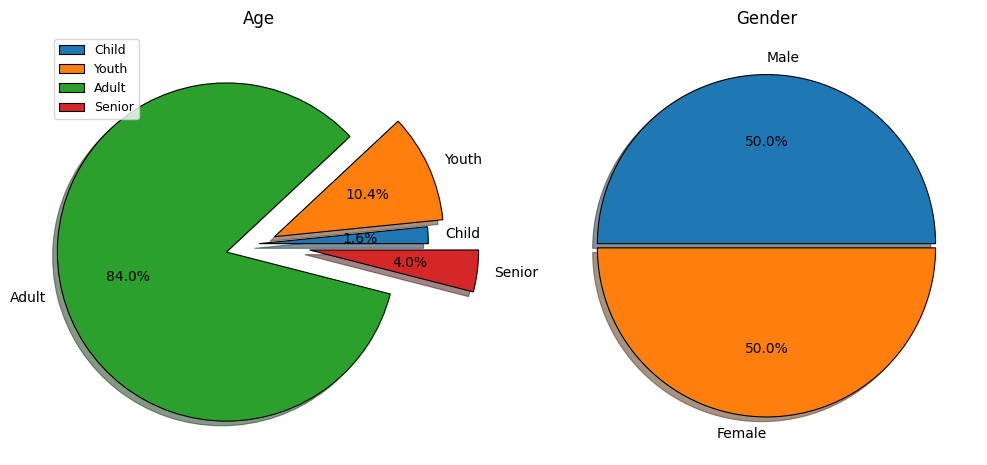

In [13]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(x=[child_data.shape[0], youth_data.shape[0], adult_data.shape[0], senior_data.shape[0]],
        autopct='%1.1f%%', 
        labels=['Child', 'Youth', 'Adult', 'Senior'],
       wedgeprops={'linewidth': .8, 'edgecolor': 'black'},
       explode=[0, 0.1, 0.2, 0.3],
        shadow=True
       )
plt.title("Age")
plt.legend(loc='upper left', fontsize= 9)


plt.subplot(1, 2, 2)
plt.pie(x=[male_data.shape[0], female_data.shape[0]],
        autopct='%1.1f%%', 
        labels=['Male', 'Female'],
       wedgeprops={'linewidth': .8, 'edgecolor': 'black'},
       explode=[0, 0.025],
        shadow=True
       )
plt.title("Gender")

plt.show()

# Child data

In [14]:
Bedtime_child_data = child_data[(child_data['Bedtime'].dt.time > pd.to_datetime('8:00 PM').time()) & (child_data['Bedtime'].dt.time <= pd.to_datetime('11:59 PM').time())]
Bedtime_child_data1 = child_data[(child_data['Bedtime'].dt.time >= pd.to_datetime('12:00 AM').time()) & (child_data['Bedtime'].dt.time <= pd.to_datetime('3:00 AM').time())]

Wakeuptime_child_data = child_data[(child_data['Wakeup time'].dt.time > pd.to_datetime('2:50 AM').time()) & (child_data['Wakeup time'].dt.time <= pd.to_datetime('7:30 AM').time())]
Wakeuptime_child_data1 = child_data[(child_data['Wakeup time'].dt.time >= pd.to_datetime('7:31 AM').time()) & (child_data['Wakeup time'].dt.time <= pd.to_datetime('11:00 AM').time())]

In [15]:
Wakeuptime_child_data1.shape

(6, 16)

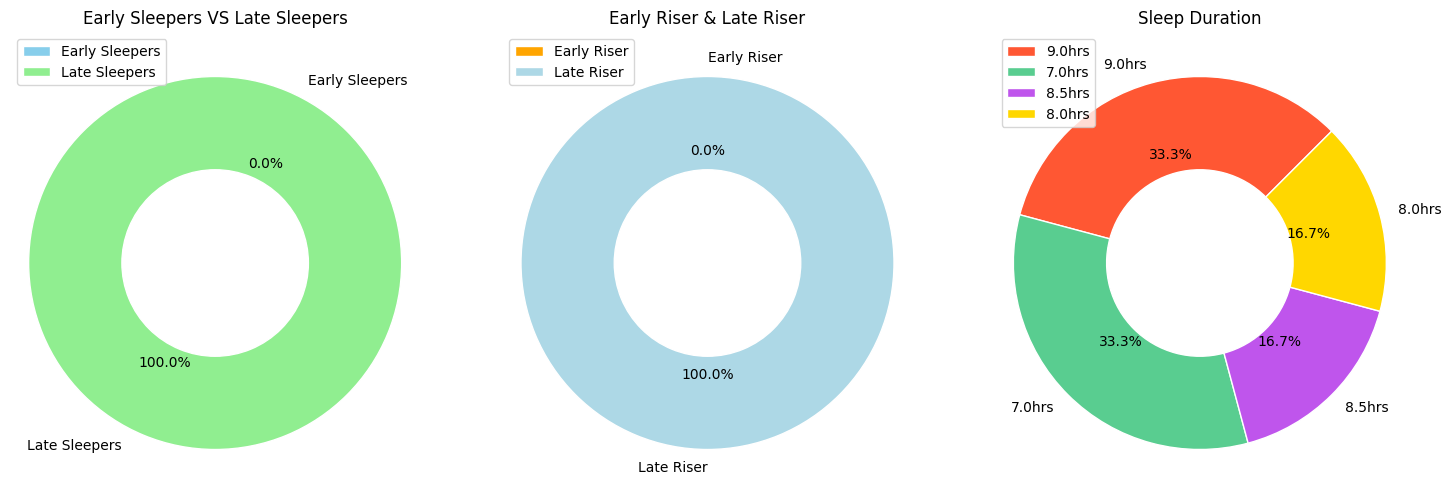

In [16]:
labels1 = ['Early Sleepers', 'Late Sleepers']
sizes1 = [Bedtime_child_data.shape[0], Bedtime_child_data1.shape[0]]
colors1 = ['skyblue', 'lightgreen']
hole_size = 0.5


labels2 = ['Early Riser', 'Late Riser']
sizes2 = [Wakeuptime_child_data.shape[0],  Wakeuptime_child_data1.shape[0]]
colors2 = ['orange', 'lightblue', 'pink']

labels3 = []
for i in (child_data['Sleep duration'].value_counts()).index:
    labels3.append(str((i)) + "hrs")

sizes3 = child_data['Sleep duration'].value_counts()
colors3 = ['#FF5733', '#59CD90', '#BF55EC', '#FFD700', '#00CED1', '#FFA07A']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = axes[0]
wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=63,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax1.add_artist(centre_circle)
ax1.set_title('Early Sleepers VS Late Sleepers')
ax1.axis('equal')

ax1.legend(wedges1, labels1, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax2 = axes[1]
wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax2.add_artist(centre_circle)
ax2.set_title('Early Riser & Late Riser')
ax2.axis('equal')

ax2.legend(wedges2, labels2, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax3 = axes[2]
wedges3, texts3, autotexts3 = ax3.pie(sizes3, labels=labels3, colors=colors3, autopct='%1.1f%%', startangle=45,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax3.add_artist(centre_circle)
ax3.set_title('Sleep Duration')
ax3.axis('equal')

ax3.legend(wedges3, labels3, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

plt.show()

# YOUTH DATA 


In [17]:
Bedtime_youth_data = youth_data[(youth_data['Bedtime'].dt.time > pd.to_datetime('8:00 PM').time()) & (youth_data['Bedtime'].dt.time <= pd.to_datetime('11:59 PM').time())]
Bedtime_youth_data1 = youth_data[(youth_data['Bedtime'].dt.time >= pd.to_datetime('12:00 AM').time()) & (youth_data['Bedtime'].dt.time <= pd.to_datetime('3:00 AM').time())]

Wakeuptime_youth_data = youth_data[(youth_data['Wakeup time'].dt.time > pd.to_datetime('2:50 AM').time()) & (youth_data['Wakeup time'].dt.time <= pd.to_datetime('7:30 AM').time())]
Wakeuptime_youth_data1 = youth_data[(youth_data['Wakeup time'].dt.time >= pd.to_datetime('7:31 AM').time()) & (youth_data['Wakeup time'].dt.time <= pd.to_datetime('11:00 AM').time())]

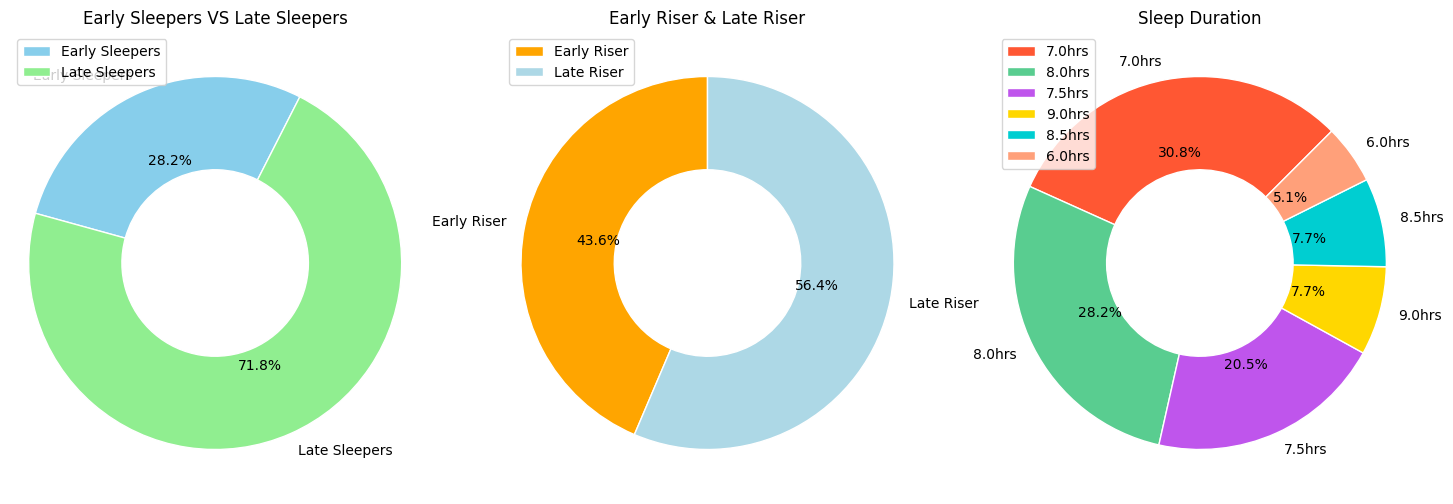

In [18]:
labels1 = ['Early Sleepers', 'Late Sleepers']
sizes1 = [Bedtime_youth_data.shape[0], Bedtime_youth_data1.shape[0]]
colors1 = ['skyblue', 'lightgreen']
hole_size = 0.5


labels2 = ['Early Riser', 'Late Riser']
sizes2 = [Wakeuptime_youth_data.shape[0],  Wakeuptime_youth_data1.shape[0]]
colors2 = ['orange', 'lightblue', 'pink']

labels3 = []
for i in (youth_data['Sleep duration'].value_counts()).index:
    labels3.append(str((i)) + "hrs")

sizes3 = youth_data['Sleep duration'].value_counts()
colors3 = ['#FF5733', '#59CD90', '#BF55EC', '#FFD700', '#00CED1', '#FFA07A']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = axes[0]
wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=63,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax1.add_artist(centre_circle)
ax1.set_title('Early Sleepers VS Late Sleepers')
ax1.axis('equal')

ax1.legend(wedges1, labels1, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax2 = axes[1]
wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax2.add_artist(centre_circle)
ax2.set_title('Early Riser & Late Riser')
ax2.axis('equal')

ax2.legend(wedges2, labels2, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax3 = axes[2]
wedges3, texts3, autotexts3 = ax3.pie(sizes3, labels=labels3, colors=colors3, autopct='%1.1f%%', startangle=45,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax3.add_artist(centre_circle)
ax3.set_title('Sleep Duration')
ax3.axis('equal')

ax3.legend(wedges3, labels3, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

plt.show()

# adult data

In [19]:
Bedtime_adult_data = adult_data[(adult_data['Bedtime'].dt.time > pd.to_datetime('8:00 PM').time()) & (adult_data['Bedtime'].dt.time <= pd.to_datetime('11:59 PM').time())]
Bedtime_adult_data1 = adult_data[(adult_data['Bedtime'].dt.time >= pd.to_datetime('12:00 AM').time()) & (adult_data['Bedtime'].dt.time <= pd.to_datetime('3:00 AM').time())]

Wakeuptime_adult_data = adult_data[(adult_data['Wakeup time'].dt.time > pd.to_datetime('2:50 AM').time()) & (adult_data['Wakeup time'].dt.time <= pd.to_datetime('7:30 AM').time())]
Wakeuptime_adult_data1 = adult_data[(adult_data['Wakeup time'].dt.time >= pd.to_datetime('7:31 AM').time()) & (adult_data['Wakeup time'].dt.time <= pd.to_datetime('11:00 AM').time())]

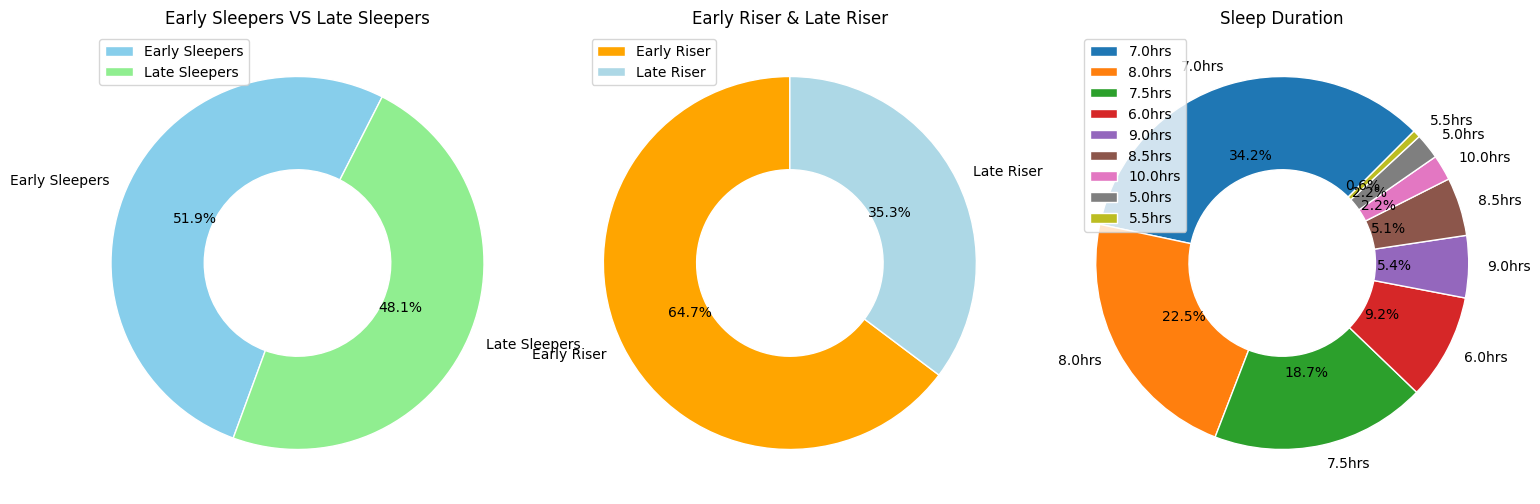

In [20]:
import matplotlib.pyplot as plt

labels1 = ['Early Sleepers', 'Late Sleepers']
sizes1 = [Bedtime_adult_data.shape[0], Bedtime_adult_data1.shape[0]]
colors1 = ['skyblue', 'lightgreen']
hole_size = 0.5

labels2 = ['Early Riser', 'Late Riser']
sizes2 = [Wakeuptime_adult_data.shape[0],  Wakeuptime_adult_data1.shape[0]]
colors2 = ['orange', 'lightblue', 'pink']

labels3 = []
for i in (adult_data['Sleep duration'].value_counts()).index:
    labels3.append(str((i)) + "hrs")

sizes3 = adult_data['Sleep duration'].value_counts()
colors3 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = axes[0]
wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=63,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax1.add_artist(centre_circle)
ax1.set_title('Early Sleepers VS Late Sleepers')
ax1.axis('equal')
ax1.legend(wedges1, labels1, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax2 = axes[1]
wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax2.add_artist(centre_circle)
ax2.set_title('Early Riser & Late Riser')
ax2.axis('equal')
ax2.legend(wedges2, labels2, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax3 = axes[2]
wedges3, texts3, autotexts3 = ax3.pie(sizes3, labels=labels3, colors=colors3, autopct='%1.1f%%', startangle=45,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax3.add_artist(centre_circle)
ax3.set_title('Sleep Duration')
ax3.axis('equal')
ax3.legend(wedges3, labels3, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

plt.show()

# senior data


In [21]:
Bedtime_senior_data = senior_data[(senior_data['Bedtime'].dt.time > pd.to_datetime('8:00 PM').time()) & (senior_data['Bedtime'].dt.time <= pd.to_datetime('11:59 PM').time())]
Bedtime_senior_data1 = senior_data[(senior_data['Bedtime'].dt.time >= pd.to_datetime('12:00 AM').time()) & (senior_data['Bedtime'].dt.time <= pd.to_datetime('3:00 AM').time())]

Wakeuptime_senior_data = senior_data[(senior_data['Wakeup time'].dt.time > pd.to_datetime('2:50 AM').time()) & (senior_data['Wakeup time'].dt.time <= pd.to_datetime('7:30 AM').time())]
Wakeuptime_senior_data1 = senior_data[(senior_data['Wakeup time'].dt.time >= pd.to_datetime('7:31 AM').time()) & (senior_data['Wakeup time'].dt.time <= pd.to_datetime('11:00 AM').time())]

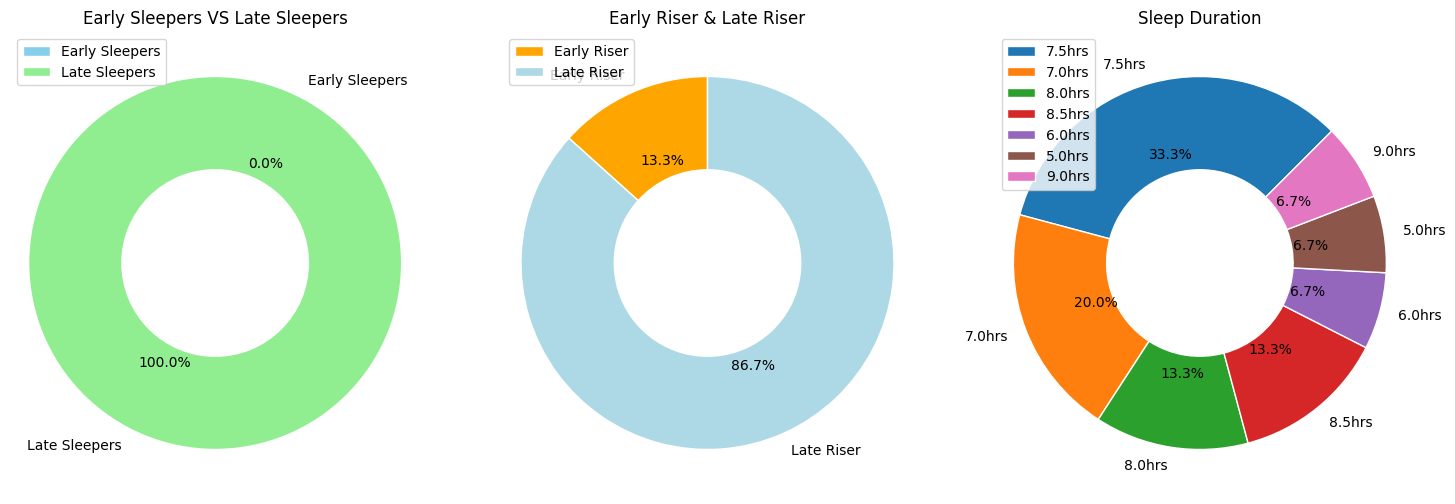

In [22]:

labels1 = ['Early Sleepers', 'Late Sleepers']
sizes1 = [Bedtime_senior_data.shape[0], Bedtime_senior_data1.shape[0]]
colors1 = ['skyblue', 'lightgreen']
hole_size = 0.5

labels2 = ['Early Riser', 'Late Riser']
sizes2 = [Wakeuptime_senior_data.shape[0],  Wakeuptime_senior_data1.shape[0]]
colors2 = ['orange', 'lightblue', 'pink']

labels3 = []
for i in (senior_data['Sleep duration'].value_counts()).index:
    labels3.append(str((i)) + "hrs")

sizes3 = senior_data['Sleep duration'].value_counts()
colors3 = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))

ax1 = axes[0]
wedges1, texts1, autotexts1 = ax1.pie(sizes1, labels=labels1, colors=colors1, autopct='%1.1f%%', startangle=63,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax1.add_artist(centre_circle)
ax1.set_title('Early Sleepers VS Late Sleepers')
ax1.axis('equal')
ax1.legend(wedges1, labels1, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax2 = axes[1]
wedges2, texts2, autotexts2 = ax2.pie(sizes2, labels=labels2, colors=colors2, autopct='%1.1f%%', startangle=90,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax2.add_artist(centre_circle)
ax2.set_title('Early Riser & Late Riser')
ax2.axis('equal')
ax2.legend(wedges2, labels2, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

ax3 = axes[2]
wedges3, texts3, autotexts3 = ax3.pie(sizes3, labels=labels3, colors=colors3, autopct='%1.1f%%', startangle=45,
                                      wedgeprops=dict(width=hole_size, edgecolor='white'))
centre_circle = plt.Circle((0, 0), hole_size/2, color='white')
ax3.add_artist(centre_circle)
ax3.set_title('Sleep Duration')
ax3.axis('equal')
ax3.legend(wedges3, labels3, loc="upper left", bbox_to_anchor=(0, 0, 0.5, 1))

plt.show()

# Sleep efficiency MALE VS FEMALE


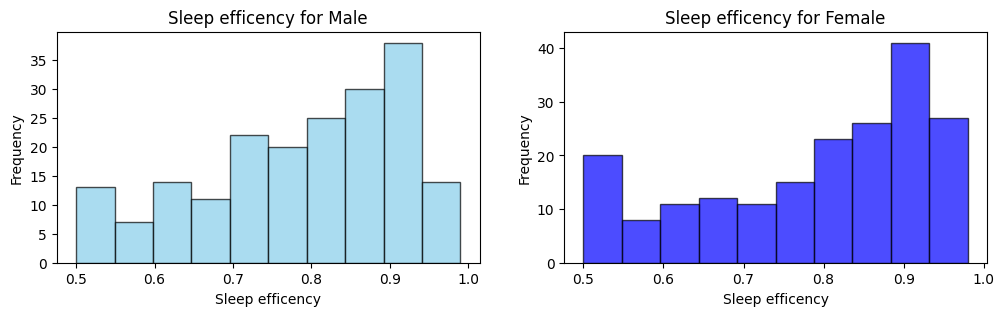

In [23]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
plt.hist(male_data['Sleep efficiency'], bins=10, color='skyblue', edgecolor='black', alpha=0.7)

plt.xlabel('Sleep efficency')
plt.ylabel('Frequency')
plt.title('Sleep efficency for Male')

plt.subplot(1, 2, 2)
plt.hist(female_data['Sleep efficiency'], bins=10, color='blue', edgecolor='black', alpha=0.7)

plt.xlabel('Sleep efficency')
plt.ylabel('Frequency')
plt.title('Sleep efficency for Female')

plt.show()

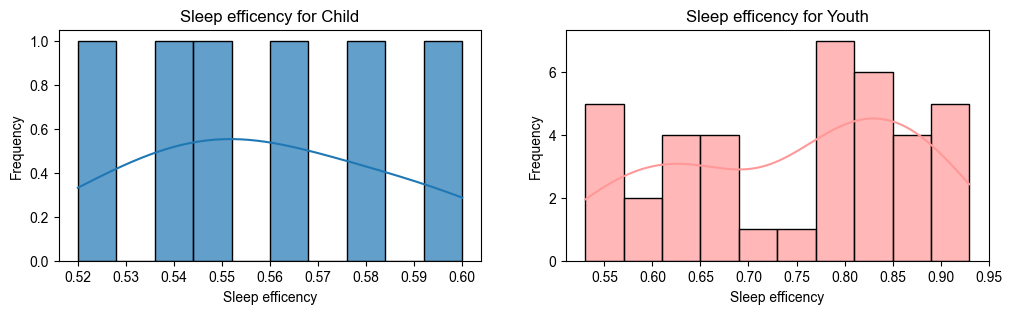

In [24]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(child_data['Sleep efficiency'], bins=10, color='#1f77b4', kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Sleep efficency')
plt.ylabel('Frequency')
plt.title('Sleep efficency for Child')

plt.subplot(1, 2, 2)
sns.set(style='darkgrid')
sns.histplot(youth_data['Sleep efficiency'], bins=10, color='#FF9999', kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Sleep efficency')
plt.ylabel('Frequency')
plt.title('Sleep efficency for Youth')

plt.show()

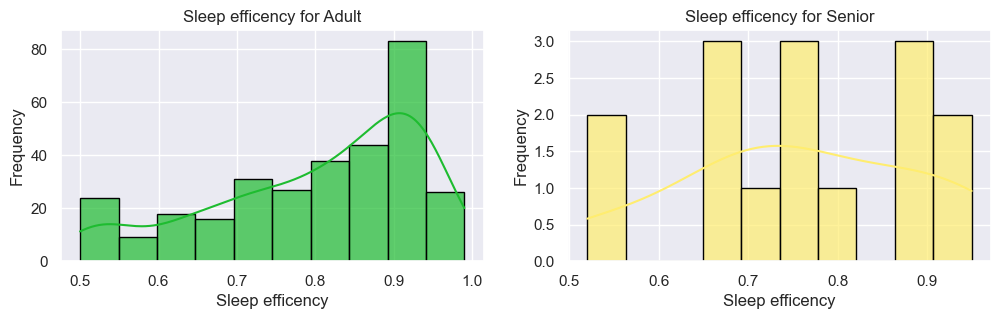

In [25]:
plt.figure(figsize=(12, 3))

plt.subplot(1, 2, 1)
sns.histplot(adult_data['Sleep efficiency'], bins=10, color='#1ebc30', kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Sleep efficency')
plt.ylabel('Frequency')
plt.title('Sleep efficency for Adult')

plt.subplot(1, 2, 2)
sns.set(style='darkgrid')
sns.histplot(senior_data['Sleep efficiency'], bins=10, color='#ffed6f', kde=True, edgecolor='black', alpha=0.7)

plt.xlabel('Sleep efficency')
plt.ylabel('Frequency')
plt.title('Sleep efficency for Senior')

plt.show()

# Smoker and Non smoker data analysis

In [26]:
smoker = data[data['Smoking status']== "Yes"]
non_smoker = data[data['Smoking status']== "No"]

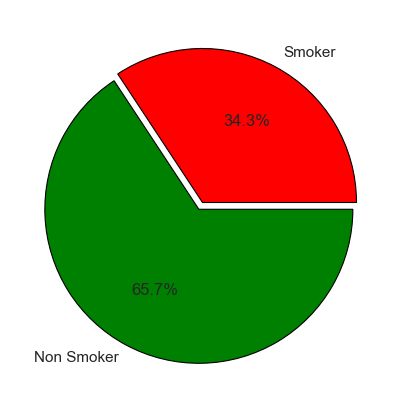

In [31]:
plt.figure(figsize=(10, 5))
plt.pie(x=[smoker.shape[0], non_smoker.shape[0]],
        autopct='%1.1f%%', 
        labels=['Smoker', 'Non Smoker'],
       wedgeprops={'linewidth': .8, 'edgecolor': 'black'},
       explode=[0, 0.05],
        colors = ['red', 'green']
       )
plt.show()

## sleep analysis of smoker and non smoker

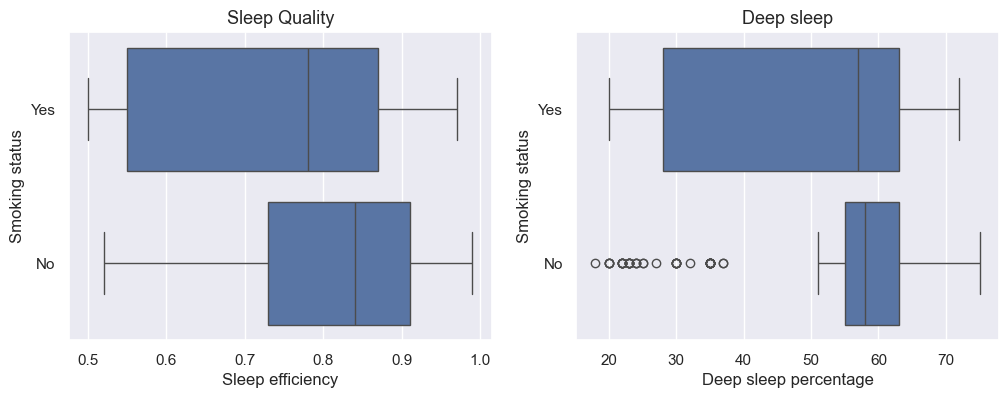

In [32]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(data=data, y='Smoking status', x='Sleep efficiency')
plt.title("Sleep Quality", fontsize=13)

plt.subplot(1, 2, 2)
sns.boxplot(data=data, y='Smoking status', x='Deep sleep percentage')
plt.title("Deep sleep", fontsize=13)


plt.show()

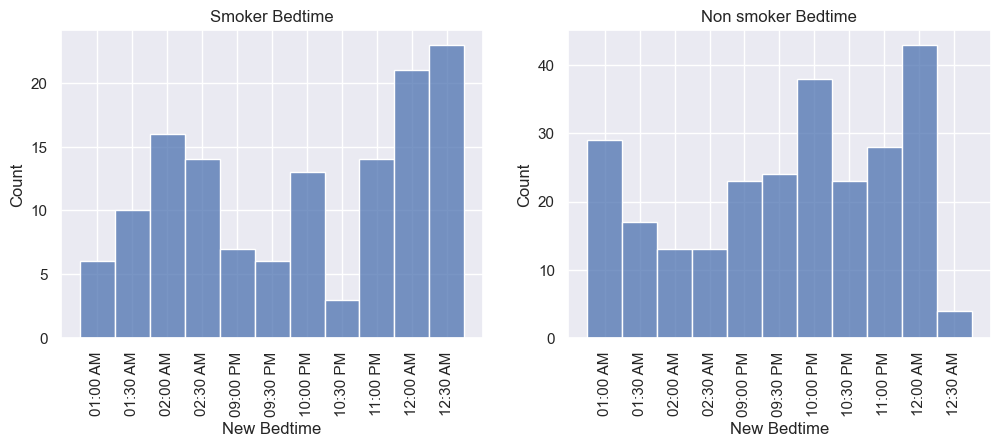

In [35]:
plt.figure(figsize=(12, 4))

sorted_smoker_data =  smoker.sort_values(by='New Bedtime')
sorted_non_smoker_data = non_smoker.sort_values(by='New Bedtime')

plt.subplot(1, 2, 1)
sns.histplot(data=sorted_smoker_data['New Bedtime'])
plt.title("Smoker Bedtime")
plt.xticks(rotation=90)

plt.subplot(1, 2, 2)
sns.histplot(data=sorted_non_smoker_data['New Bedtime'])
plt.title("Non smoker Bedtime")
plt.xticks(rotation=90)

plt.show()


Alcoholic vs Non alcoholic 

In [36]:
non_alcoholic =  data[data['Alcohol consumption'] == 0.0]
low_alcoholic = data[(data['Alcohol consumption'] >0.0) & (data['Alcohol consumption']  <= 3.0)]
high_alcoholic = data[data['Alcohol consumption'] > 3.0]

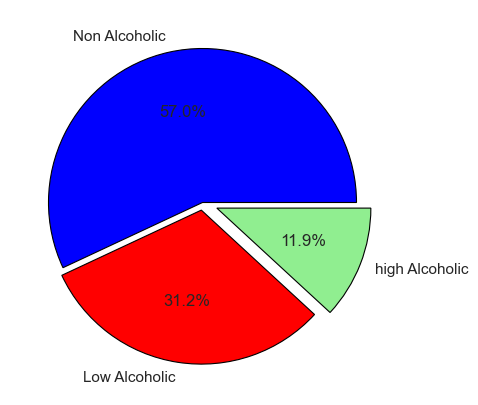

In [38]:
plt.figure(figsize=(10, 5))
plt.pie(x=[non_alcoholic.shape[0], low_alcoholic.shape[0], high_alcoholic.shape[0]],
        autopct='%1.1f%%', 
        labels=['Non Alcoholic', 'Low Alcoholic', 'high Alcoholic'],
       wedgeprops={'linewidth': .8, 'edgecolor': 'black'},
       explode=[0, 0.05, 0.1],
        colors = ['blue', 'red', 'lightgreen']
       )
plt.show()

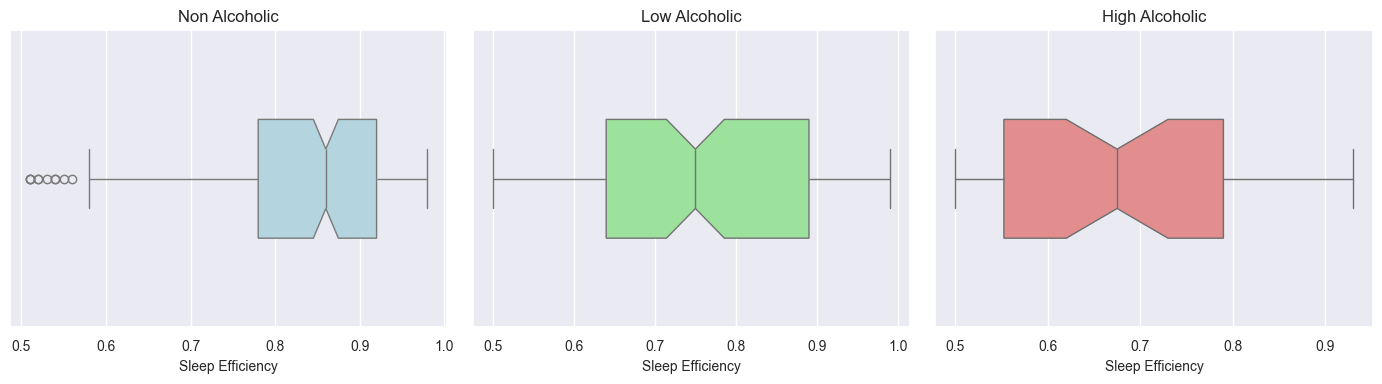

In [39]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_alcoholic, x='Sleep efficiency', color='lightblue', notch=True, linewidth=1, width=0.4)
plt.title("Non Alcoholic", fontsize=12)
plt.xlabel('Sleep Efficiency', fontsize=10)
plt.ylabel('')  # Remove y-axis label for better appearance
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 2)
sns.boxplot(data=low_alcoholic, x='Sleep efficiency', color='lightgreen', notch=True, linewidth=1, width=0.4)
plt.title("Low Alcoholic", fontsize=12)
plt.xlabel('Sleep Efficiency', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 3)
sns.boxplot(data=high_alcoholic, x='Sleep efficiency', color='lightcoral', notch=True, linewidth=1, width=0.4)
plt.title("High Alcoholic", fontsize=12)
plt.xlabel('Sleep Efficiency', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()

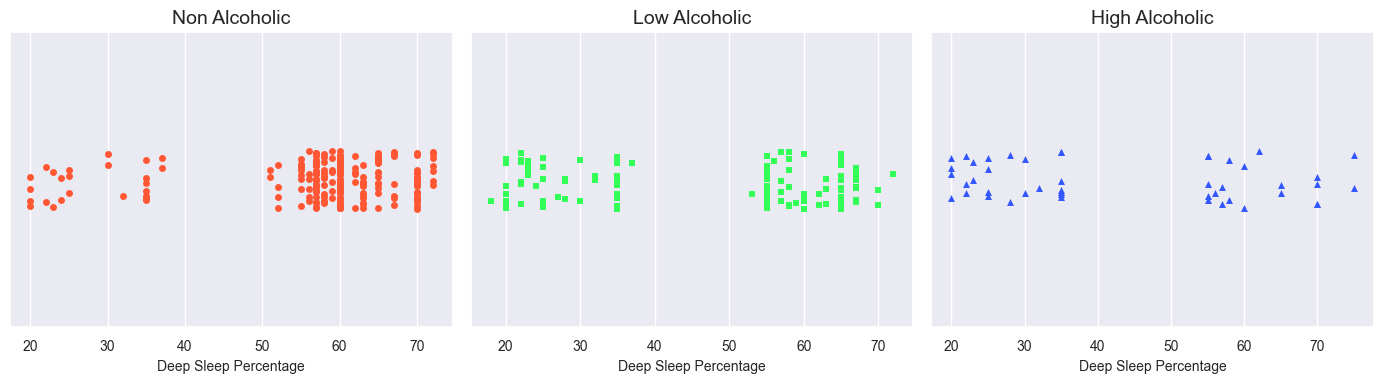

In [40]:
vivid_colors = ["#FF5733", "#33FF57", "#3357FF"]

plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.stripplot(data=non_alcoholic, x='Deep sleep percentage', jitter=True, marker='o', color=vivid_colors[0])
plt.title("Non Alcoholic", fontsize=14)
plt.xlabel('Deep Sleep Percentage', fontsize=10)
plt.ylabel('')  # Remove y-axis label for better appearance
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 2)
sns.stripplot(data=low_alcoholic, x='Deep sleep percentage', jitter=True, marker='s', color=vivid_colors[1])
plt.title("Low Alcoholic", fontsize=14)
plt.xlabel('Deep Sleep Percentage', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 3)
sns.stripplot(data=high_alcoholic, x='Deep sleep percentage', jitter=True, marker='^', color=vivid_colors[2])
plt.title("High Alcoholic", fontsize=14)
plt.xlabel('Deep Sleep Percentage', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()

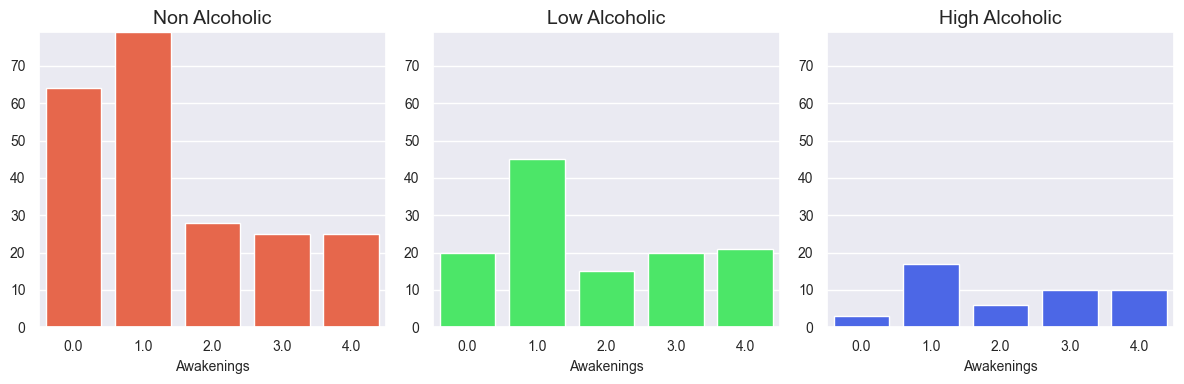

In [41]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.countplot(data=non_alcoholic, x='Awakenings', color=vivid_colors[0])
plt.title("Non Alcoholic", fontsize=14)
plt.xlabel('Awakenings', fontsize=10)
plt.ylabel('') 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

max_count = max(non_alcoholic['Awakenings'].value_counts().max(),
                low_alcoholic['Awakenings'].value_counts().max(),
                high_alcoholic['Awakenings'].value_counts().max())

plt.subplot(1, 3, 1).set_ylim(0, max_count)

plt.subplot(1, 3, 2)
sns.countplot(data=low_alcoholic, x='Awakenings', color=vivid_colors[1])
plt.title("Low Alcoholic", fontsize=14)
plt.xlabel('Awakenings', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 2).set_ylim(0, max_count)

plt.subplot(1, 3, 3)
sns.countplot(data=high_alcoholic, x='Awakenings', color =vivid_colors[2])
plt.title("High Alcoholic", fontsize=14)
plt.xlabel('Awakenings', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 3).set_ylim(0, max_count)

plt.tight_layout()

plt.show()


# Caffine identifier

In [42]:
data['Caffeine consumption'].unique()

array([  0.,  50.,  25.,  75., 200., 100.])

In [43]:
non_caffeine = data[data['Caffeine consumption'] ==0.0]
low_caffeine = data[(data['Caffeine consumption'] > 0.0) & (data['Caffeine consumption'] < 100)]
high_caffeine = data[data['Caffeine consumption']  >= 100.0]

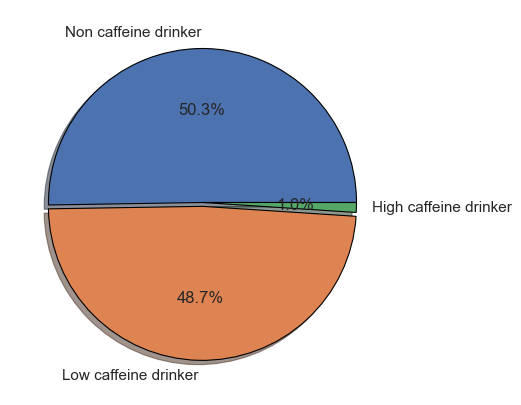

In [44]:
plt.figure(figsize=(5, 5))
plt.pie(x=[non_caffeine.shape[0], low_caffeine.shape[0], high_caffeine.shape[0]],
        autopct='%1.1f%%', 
        labels=['Non caffeine drinker', 'Low caffeine drinker', 'High caffeine drinker'],
       wedgeprops={'linewidth': .8, 'edgecolor': 'black'},
       explode=[0, 0.025, 0],
        shadow=True
       )
plt.show()

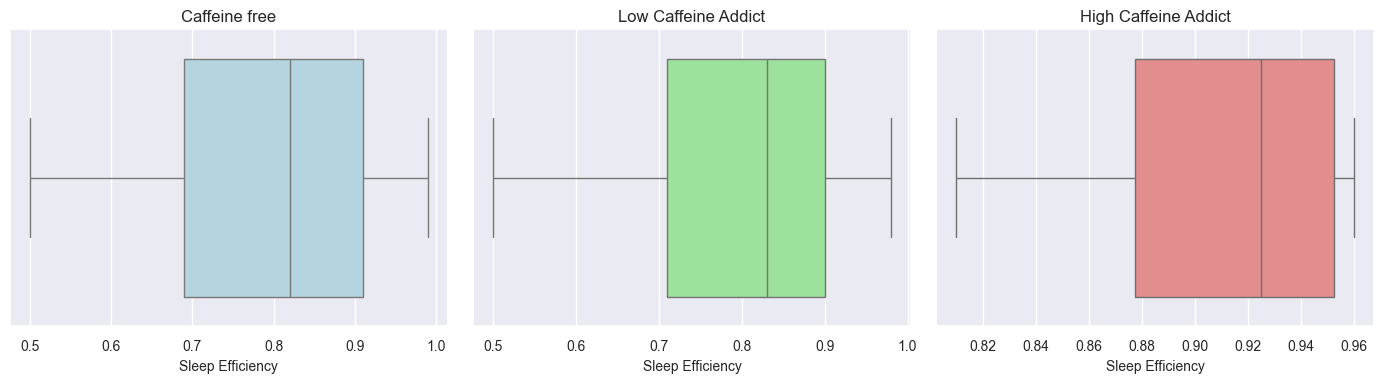

In [45]:
plt.figure(figsize=(14, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=non_caffeine, x='Sleep efficiency', color='lightblue')
plt.title("Caffeine free", fontsize=12)
plt.xlabel('Sleep Efficiency', fontsize=10)
plt.ylabel('') 
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 2)
sns.boxplot(data=low_caffeine, x='Sleep efficiency', color='lightgreen')
plt.title("Low Caffeine Addict", fontsize=12)
plt.xlabel('Sleep Efficiency', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.subplot(1, 3, 3)
sns.boxplot(data=high_caffeine, x='Sleep efficiency', color='lightcoral')
plt.title("High Caffeine Addict", fontsize=12)
plt.xlabel('Sleep Efficiency', fontsize=10)
plt.ylabel('')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()

plt.show()


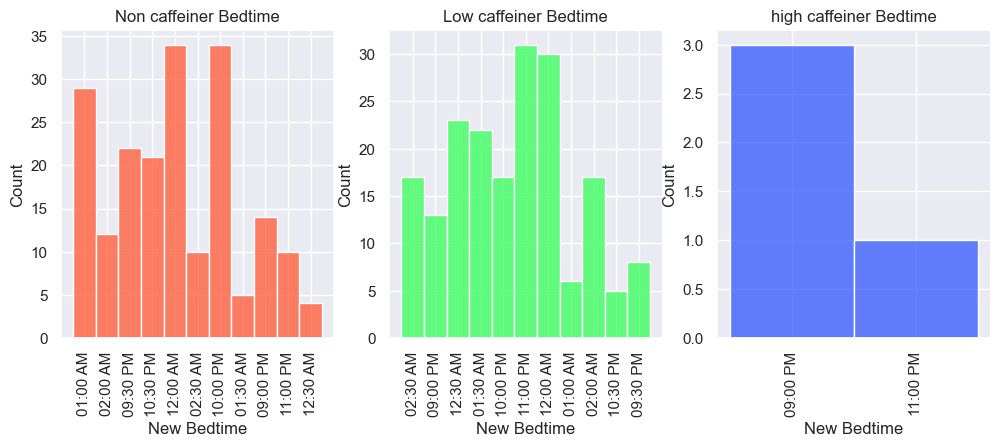

In [48]:
plt.figure(figsize=(12, 4))


plt.subplot(1, 3, 1)
sns.histplot(data=non_caffeine['New Bedtime'],color=vivid_colors[0])
plt.title("Non caffeiner Bedtime")
plt.xticks(rotation=90)

plt.subplot(1, 3, 2)
sns.histplot(data=low_caffeine['New Bedtime'],color=vivid_colors[1])
plt.title("Low caffeiner Bedtime")
plt.xticks(rotation=90)


plt.subplot(1, 3, 3)
sns.histplot(data=high_caffeine['New Bedtime'],color=vivid_colors[2])
plt.title("high caffeiner Bedtime")
plt.xticks(rotation=90)


plt.show()


## Excercise

In [49]:
data['Exercise frequency'].unique()

array([3., 1., 0., 5., 2., 4.])

C:\Users\aritr\AppData\Local\Temp\ipykernel_7672\4190627449.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Exercise frequency'], palette=custom_colors)
C:\Users\aritr\AppData\Local\Temp\ipykernel_7672\4190627449.py:5: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x=data['Exercise frequency'], palette=custom_colors)


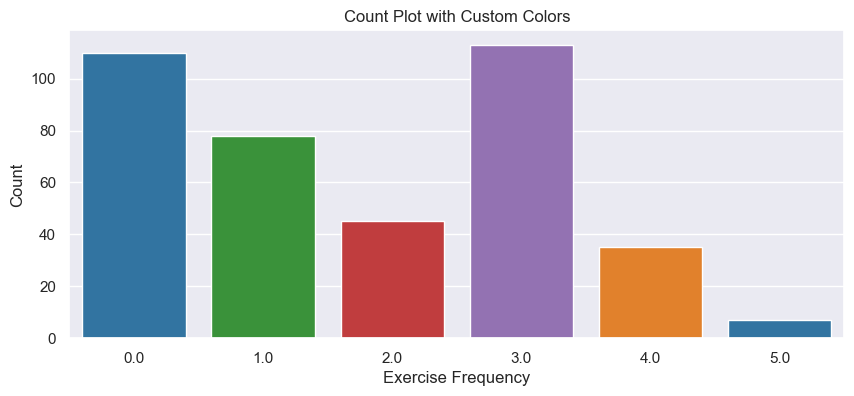

In [50]:
custom_colors = ['#1f77b4', '#2ca02c', '#d62728', '#9467bd', '#ff7f0e']

plt.figure(figsize=(10, 4))

sns.countplot(x=data['Exercise frequency'], palette=custom_colors)

plt.title('Count Plot with Custom Colors')
plt.xlabel('Exercise Frequency')
plt.ylabel('Count')

plt.show()


C:\Users\aritr\AppData\Local\Temp\ipykernel_7672\3235076938.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=data, x='Exercise frequency', y='Sleep efficiency', palette=custom_palette)
C:\Users\aritr\AppData\Local\Temp\ipykernel_7672\3235076938.py:3: UserWarning: 
The palette list has fewer values (5) than needed (6) and will cycle, which may produce an uninterpretable plot.
  sns.swarmplot(data=data, x='Exercise frequency', y='Sleep efficiency', palette=custom_palette)


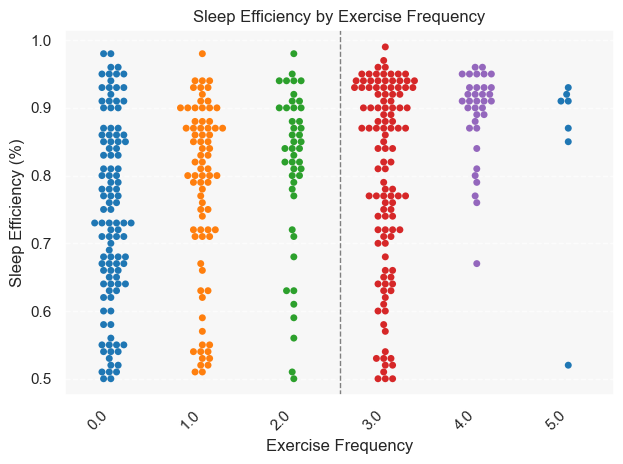

In [53]:
custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

sns.swarmplot(data=data, x='Exercise frequency', y='Sleep efficiency', palette=custom_palette)


plt.title('Sleep Efficiency by Exercise Frequency')
plt.xlabel('Exercise Frequency')
plt.ylabel('Sleep Efficiency (%)')

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.gca().set_facecolor('#f7f7f7')

plt.axvline(x=2.5, color='gray', linestyle='--', linewidth=1)

plt.tight_layout()
plt.show()